In [1]:
import pandas as pd
from numpy.random import choice

import joblib
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from cyl import cuantas_vocales, cuantas_letras, generar_juego, es_solucion, mejor_solucion, reemplazar_acentos

In [2]:
print(cuantas_vocales('dos'))
print(cuantas_letras('sábado'))
print(cuantas_vocales('murciélago'))

1
6
5


In [3]:
rae = pd.read_csv('./data/0_palabras_todas.txt', header = None, )
rae.columns = ['Palabra']
rae['Vocales'] = rae['Palabra'].apply(cuantas_vocales, )
rae['Letras'] = rae['Palabra'].apply(cuantas_letras, )
rae.head(5)

,Palabra,Vocales,Letras
0,a,1,1
1,aba,2,3
2,ába,2,3
3,abaá,3,4
4,ababilla,4,8


In [4]:
rae['Vocales'].value_counts(sort = False)

1        532
2      17824
3      91493
4     187739
5     193229
6     110660
7      36348
8       7322
9       1208
10       214
11        20
0         26
Name: Vocales, dtype: int64

In [5]:
rae['Letras'].value_counts(sort = False)

1         27
3        584
4       3814
8      75136
10    101287
12     74444
13     52394
11     93834
9      93598
14     30897
6      28267
5      12614
7      50805
15     16218
16      7521
17      2987
18      1261
2        103
19       501
20       195
22        32
21        89
23         4
26         2
24         1
Name: Letras, dtype: int64

In [6]:
rae.loc[rae.Vocales == 0, :]

,Palabra,Vocales,Letras
98033,b,0,1
115431,c,0,1
134820,ch,0,2
182216,d,0,1
360951,f,0,1
376147,g,0,1
389477,h,0,1
419952,j,0,1
425500,k,0,1
425697,l,0,1


<Axes: ylabel='Letras'>

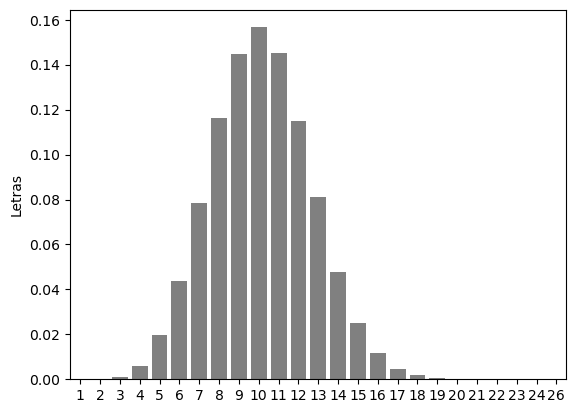

In [7]:
sns.barplot(
    x = rae['Letras'].value_counts(normalize = True).index,
    y = rae['Letras'].value_counts(normalize = True),
    color = 'gray')

<Axes: ylabel='Vocales'>

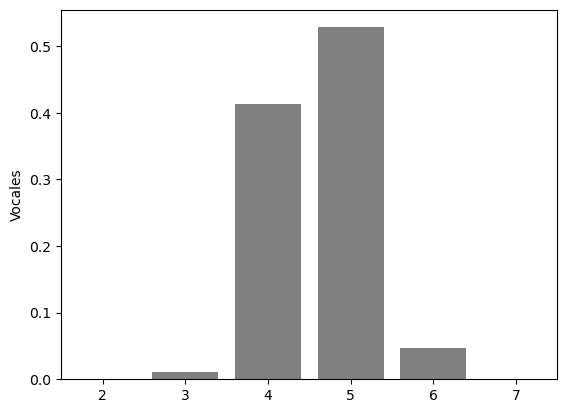

In [8]:
sns.barplot(
    x = rae.loc[rae.Letras == 10, 'Vocales'].value_counts(normalize = True).index,
    y = rae.loc[rae.Letras == 10, 'Vocales'].value_counts(normalize = True),
    color = 'gray')

<Axes: ylabel='Vocales'>

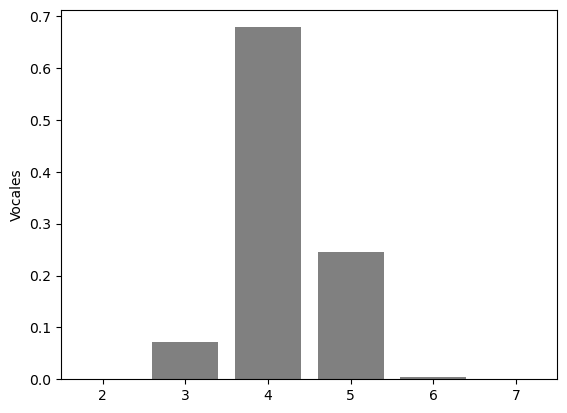

In [9]:
sns.barplot(
    x = rae.loc[rae.Letras == 9, 'Vocales'].value_counts(normalize = True).index,
    y = rae.loc[rae.Letras == 9, 'Vocales'].value_counts(normalize = True),
    color = 'gray')

<Axes: ylabel='Vocales'>

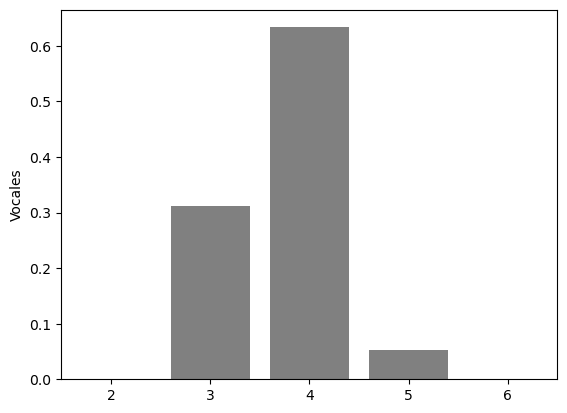

In [10]:
sns.barplot(
    x = rae.loc[rae.Letras == 8, 'Vocales'].value_counts(normalize = True).index,
    y = rae.loc[rae.Letras == 8, 'Vocales'].value_counts(normalize = True),
    color = 'gray')

In [11]:
pd.crosstab(rae['Letras'], rae['Vocales'], normalize = 'index')

Vocales,0,1,2,3,4,5,6,7,8,9,10,11
Letras,,,,,,,,,,,,
1,0.814815,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.029126,0.941748,0.029126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.417808,0.580479,0.001712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000262,0.034872,0.897745,0.067121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.003488,0.594181,0.400111,0.002220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000318,0.189408,0.747833,0.062440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.021494,0.661962,0.313237,0.003307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.001318,0.312207,0.633411,0.053024,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000139,0.072256,0.678455,0.244920,0.004220,0.000011,0.000000,0.000000,0.000000,0.000000


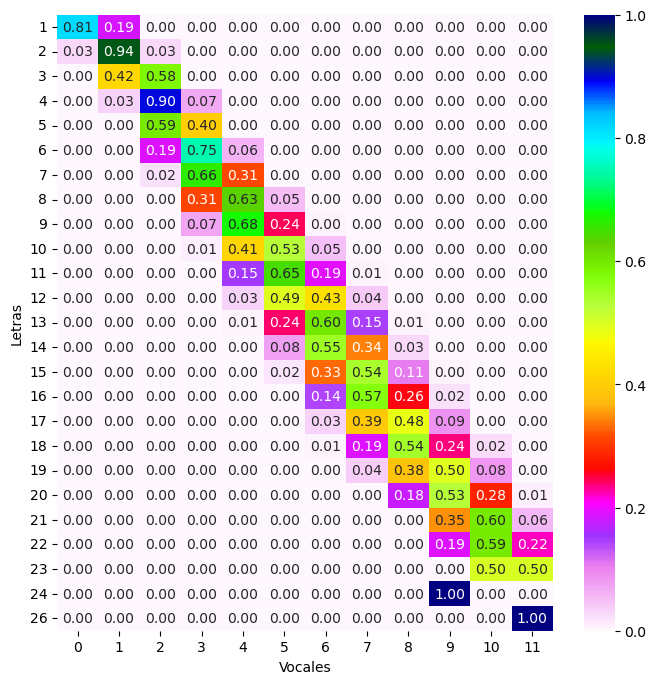

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.heatmap(data = pd.crosstab(rae['Letras'], rae['Vocales'], normalize = 'index'), 
            cmap = 'gist_ncar_r',
            annot = True, fmt = '.2f', vmin = 0, vmax = 1, ax = ax)

ax.set_yticks([x+0.5 for x in range(0,25)], 
              [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26],
             rotation = 0)
plt.show()

In [13]:
generar_juego(nvocales = 5)

['a', 'w', 'o', 'i', 'b', 'y', 'i', 'v', 'l', 'o']

In [14]:
palabras_candidatas = rae.loc[((rae.Letras >= 5) & (rae.Letras <= 10))].sort_values(by = 'Letras')
palabras_candidatas.head(10)

,Palabra,Vocales,Letras
646614,zuzón,2,5
86832,atesé,3,5
86831,atese,3,5
86787,atesá,3,5
86786,atesa,3,5
502911,plañe,2,5
502995,plañí,2,5
503088,plano,2,5
503089,plaño,2,5
86837,ateso,3,5


In [15]:
es_solucion(['s', 'o', 'n', 'i', 'a'], ['d', 's', 'o', 'w', 'n', 'i', 'o', 'a', 'l', 'u'])

True

In [16]:
propuesta_helena = generar_juego(nvocales = 5)
print(propuesta_helena)
mejor_solucion(propuesta_helena, palabras_candidatas)

['u', 'y', 'a', 'o', 'u', 'ñ', 'j', 't', 'u', 'm']


['tamujo', 6, 'uyaouñjtum']

In [17]:
mejor_solucion(list('eeptvbieer'), palabras_candidatas)

['ribetee', 7, 'eeptvbieer']

In [18]:
?mejor_solucion

Signature: mejor_solucion(propuesta_helena, palabras_candidatas)
Docstring:
Encuentra la mejor solución de palabra candidata que se puede formar con la propuesta dada.

Parameters
----------
propuesta_helena : list of str
    La lista de letras propuestas para formar palabras.
palabras_candidatas : DataFrame
    Un DataFrame con una columna 'Palabra' que contiene las palabras candidatas.

Returns
-------
list
    Una lista con la última palabra que cumple los requisitos, su longitud y la propuesta.

Examples
--------
>>> propuesta = ['a', 'b', 'c']
>>> candidatas = pd.DataFrame({'Palabra': ['abc', 'abd', 'acd', 'acdb']})
>>> mejor_solucion(propuesta, candidatas)
['abc', 3, 'abc']
File:      ~/Documentos/pregit/cifras-y-letras/cyl/cyl.py
Type:      function

In [20]:
soluciones = []
propuesta_helena = 'snqvouuepm'

for palabra in palabras_candidatas['Palabra'].values:
    if es_solucion(reemplazar_acentos(list(palabra)), propuesta_helena):
        soluciones.append([palabra, len(palabra), ''.join(propuesta_helena)])

print(len(soluciones))
soluciones


54


[['posen', 5, 'snqvouuepm'],
 ['ponés', 5, 'snqvouuepm'],
 ['pones', 5, 'snqvouuepm'],
 ['peumo', 5, 'snqvouuepm'],
 ['pensó', 5, 'snqvouuepm'],
 ['quemo', 5, 'snqvouuepm'],
 ['quepo', 5, 'snqvouuepm'],
 ['queso', 5, 'snqvouuepm'],
 ['quemó', 5, 'snqvouuepm'],
 ['punes', 5, 'snqvouuepm'],
 ['opuse', 5, 'snqvouuepm'],
 ['nueso', 5, 'snqvouuepm'],
 ['nuevo', 5, 'snqvouuepm'],
 ['noves', 5, 'snqvouuepm'],
 ['noque', 5, 'snqvouuepm'],
 ['pemón', 5, 'snqvouuepm'],
 ['sumen', 5, 'snqvouuepm'],
 ['supón', 5, 'snqvouuepm'],
 ['sumun', 5, 'snqvouuepm'],
 ['sueno', 5, 'snqvouuepm'],
 ['suevo', 5, 'snqvouuepm'],
 ['sopen', 5, 'snqvouuepm'],
 ['empós', 5, 'snqvouuepm'],
 ['mensú', 5, 'snqvouuepm'],
 ['menso', 5, 'snqvouuepm'],
 ['menos', 5, 'snqvouuepm'],
 ['mesón', 5, 'snqvouuepm'],
 ['nevus', 5, 'snqvouuepm'],
 ['mosén', 5, 'snqvouuepm'],
 ['moque', 5, 'snqvouuepm'],
 ['moqué', 5, 'snqvouuepm'],
 ['monse', 5, 'snqvouuepm'],
 ['museo', 5, 'snqvouuepm'],
 ['mueso', 5, 'snqvouuepm'],
 ['movés', 5, 

In [21]:
soluciones = []
propuesta_helena = 'snqvocamio'

for palabra in palabras_candidatas['Palabra'].values:
    if es_solucion(reemplazar_acentos(list(palabra)), propuesta_helena):
        soluciones.append([palabra, len(palabra), ''.join(propuesta_helena)])

print(len(soluciones))
soluciones


230


[['asonó', 5, 'snqvocamio'],
 ['ascio', 5, 'snqvocamio'],
 ['asomó', 5, 'snqvocamio'],
 ['asomo', 5, 'snqvocamio'],
 ['asicó', 5, 'snqvocamio'],
 ['asico', 5, 'snqvocamio'],
 ['omaní', 5, 'snqvocamio'],
 ['omaso', 5, 'snqvocamio'],
 ['omina', 5, 'snqvocamio'],
 ['ominá', 5, 'snqvocamio'],
 ['omino', 5, 'snqvocamio'],
 ['ominó', 5, 'snqvocamio'],
 ['omisa', 5, 'snqvocamio'],
 ['omiso', 5, 'snqvocamio'],
 ['osmio', 5, 'snqvocamio'],
 ['novio', 5, 'snqvocamio'],
 ['novió', 5, 'snqvocamio'],
 ['noviá', 5, 'snqvocamio'],
 ['novia', 5, 'snqvocamio'],
 ['nomás', 5, 'snqvocamio'],
 ['novas', 5, 'snqvocamio'],
 ['novás', 5, 'snqvocamio'],
 ['oímos', 5, 'snqvocamio'],
 ['ociás', 5, 'snqvocamio'],
 ['ocias', 5, 'snqvocamio'],
 ['ocaso', 5, 'snqvocamio'],
 ['ocian', 5, 'snqvocamio'],
 ['avocó', 5, 'snqvocamio'],
 ['avoco', 5, 'snqvocamio'],
 ['avión', 5, 'snqvocamio'],
 ['avino', 5, 'snqvocamio'],
 ['aviso', 5, 'snqvocamio'],
 ['avisó', 5, 'snqvocamio'],
 ['ováis', 5, 'snqvocamio'],
 ['ovina', 5, 

In [22]:
soluciones = []
propuesta_helena = 'murcielago'

for palabra in palabras_candidatas['Palabra'].values:
    if es_solucion(reemplazar_acentos(list(palabra)), propuesta_helena):
        soluciones.append([palabra, len(palabra), ''.join(propuesta_helena)])

print(len(soluciones))
soluciones


913


[['áureo', 5, 'murcielago'],
 ['ramio', 5, 'murcielago'],
 ['rámeo', 5, 'murcielago'],
 ['aromé', 5, 'murcielago'],
 ['arome', 5, 'murcielago'],
 ['rameó', 5, 'murcielago'],
 ['rameo', 5, 'murcielago'],
 ['raicé', 5, 'murcielago'],
 ['racel', 5, 'murcielago'],
 ['raceó', 5, 'murcielago'],
 ['raceo', 5, 'murcielago'],
 ['raíce', 5, 'murcielago'],
 ['raleó', 5, 'murcielago'],
 ['raleo', 5, 'murcielago'],
 ['raigo', 5, 'murcielago'],
 ['arelo', 5, 'murcielago'],
 ['recaí', 5, 'murcielago'],
 ['areló', 5, 'murcielago'],
 ['arilo', 5, 'murcielago'],
 ['rauco', 5, 'murcielago'],
 ['raulí', 5, 'murcielago'],
 ['aricó', 5, 'murcielago'],
 ['arico', 5, 'murcielago'],
 ['reamo', 5, 'murcielago'],
 ['reamó', 5, 'murcielago'],
 ['argue', 5, 'murcielago'],
 ['argel', 5, 'murcielago'],
 ['órale', 5, 'murcielago'],
 ['olura', 5, 'murcielago'],
 ['omega', 5, 'murcielago'],
 ['orgia', 5, 'murcielago'],
 ['orgía', 5, 'murcielago'],
 ['oruga', 5, 'murcielago'],
 ['olera', 5, 'murcielago'],
 ['olear', 5, 

In [23]:
analisis = []

for nvocales in [1,2,3,4,5,6,7,8,9]:
    for i in range(100):
        
        soluciones = []
        propuesta_helena = generar_juego(nvocales = nvocales)

        for palabra in palabras_candidatas['Palabra'].values:
            if es_solucion(reemplazar_acentos(list(palabra)), propuesta_helena):
                soluciones.append([palabra, len(palabra), ''.join(propuesta_helena)])

        analisis.append([nvocales, len(soluciones)])
        

In [24]:
joblib.dump(
    value = {'rae': rae, 
             'palabras_candidatas': palabras_candidatas, 
             'analisis': {'data': analisis, 
                          'nvocales': [1,2,3,4,5,6,7,8,9], 
                          'iterations': 100}},
    filename = datetime.datetime.now().strftime("%Y%m%d%H%M") + '_solutions.joblib')
   

['202404261342_solutions.joblib']

In [25]:
pd.DataFrame(analisis, columns = ['Vocales', 'Soluciones']).groupby(['Vocales']).describe()

Soluciones                                                    
             count   mean         std  min    25%   50%     75%    max
Vocales                                                               
1            100.0   0.08    0.307482  0.0   0.00   0.0    0.00    2.0
2            100.0  12.80   18.181465  0.0   1.00   5.0   17.25   96.0
3            100.0  30.61   37.485322  0.0   2.00  19.5   40.25  195.0
4            100.0  80.81  106.249249  0.0  10.75  36.0  113.50  538.0
5            100.0  65.92   82.103738  0.0  11.00  27.0   90.75  374.0
6            100.0  65.91  101.085232  0.0  11.75  30.5   76.25  633.0
7            100.0  40.07   54.931961  0.0   8.00  22.5   54.75  435.0
8            100.0  11.09   18.696456  0.0   0.75   4.5   11.00  122.0
9            100.0   0.36    0.718022  0.0   0.00   0.0    0.00    3.0

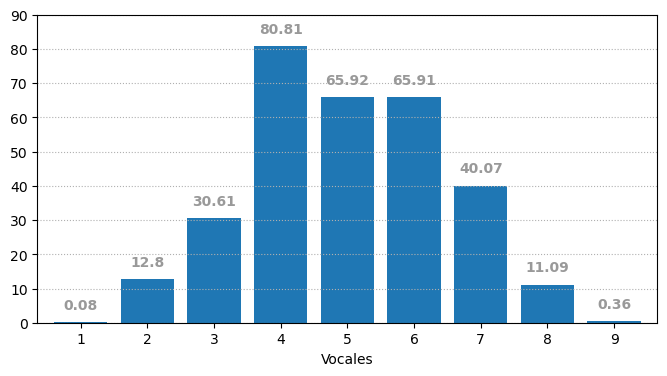

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))

pd.DataFrame(analisis, columns = ['Vocales', 'Soluciones']).groupby(['Vocales']).mean().plot.bar(ax = ax, legend = None, width = 0.8)

for i, v in enumerate(pd.DataFrame(analisis, columns = ['Vocales', 'Soluciones']).groupby(['Vocales']).mean()['Soluciones']):
    ax.text(i, v + 5, str(v), color = '0.6', fontweight = 'bold', verticalalignment = 'center', horizontalalignment = 'center')

ax.grid(linestyle = ':', axis = 'y')
ax.set_xticks([0,1,2,3,4,5,6,7,8], labels = [1,2,3,4,5,6,7,8,9],rotation = 0)
ax.set_ylim(0,90)
plt.show()

<Axes: xlabel='Vocales', ylabel='Soluciones'>

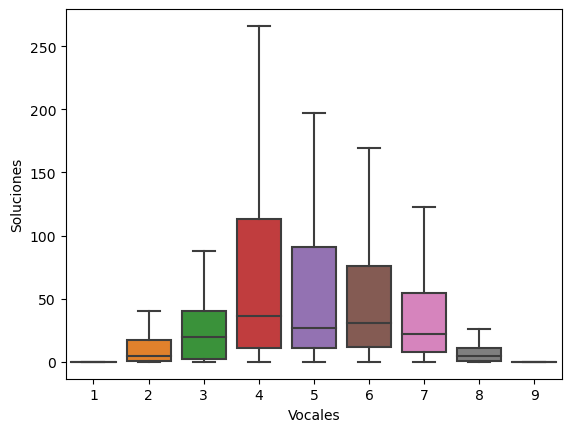

In [36]:
sns.boxplot(
    x = 'Vocales',
    y = 'Soluciones',
    showfliers = False,
    data = pd.DataFrame(analisis, columns = ['Vocales', 'Soluciones']).reset_index())
    